# Librerías

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# Cargar la base de datos

In [5]:
# reading from the file
file = open("Data/communities.names", "r")
lines=file.readlines()
file.close()

In [6]:
import pandas as pd
# reading csv files
names = pd.read_csv('Data/communities.names',sep="\t")

In [7]:
print(names.iloc[30])

Title: Communities and Crime    number of police officers, and percent of offi...
Name: 30, dtype: object


In [8]:
attributes=""" 
@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
@attribute PctPopUnderPov numeric
@attribute PctLess9thGrade numeric
@attribute PctNotHSGrad numeric
@attribute PctBSorMore numeric
@attribute PctUnemployed numeric
@attribute PctEmploy numeric
@attribute PctEmplManu numeric
@attribute PctEmplProfServ numeric
@attribute PctOccupManu numeric
@attribute PctOccupMgmtProf numeric
@attribute MalePctDivorce numeric
@attribute MalePctNevMarr numeric
@attribute FemalePctDiv numeric
@attribute TotalPctDiv numeric
@attribute PersPerFam numeric
@attribute PctFam2Par numeric
@attribute PctKids2Par numeric
@attribute PctYoungKids2Par numeric
@attribute PctTeen2Par numeric
@attribute PctWorkMomYoungKids numeric
@attribute PctWorkMom numeric
@attribute NumIlleg numeric
@attribute PctIlleg numeric
@attribute NumImmig numeric
@attribute PctImmigRecent numeric
@attribute PctImmigRec5 numeric
@attribute PctImmigRec8 numeric
@attribute PctImmigRec10 numeric
@attribute PctRecentImmig numeric
@attribute PctRecImmig5 numeric
@attribute PctRecImmig8 numeric
@attribute PctRecImmig10 numeric
@attribute PctSpeakEnglOnly numeric
@attribute PctNotSpeakEnglWell numeric
@attribute PctLargHouseFam numeric
@attribute PctLargHouseOccup numeric
@attribute PersPerOccupHous numeric
@attribute PersPerOwnOccHous numeric
@attribute PersPerRentOccHous numeric
@attribute PctPersOwnOccup numeric
@attribute PctPersDenseHous numeric
@attribute PctHousLess3BR numeric
@attribute MedNumBR numeric
@attribute HousVacant numeric
@attribute PctHousOccup numeric
@attribute PctHousOwnOcc numeric
@attribute PctVacantBoarded numeric
@attribute PctVacMore6Mos numeric
@attribute MedYrHousBuilt numeric
@attribute PctHousNoPhone numeric
@attribute PctWOFullPlumb numeric
@attribute OwnOccLowQuart numeric
@attribute OwnOccMedVal numeric
@attribute OwnOccHiQuart numeric
@attribute RentLowQ numeric
@attribute RentMedian numeric
@attribute RentHighQ numeric
@attribute MedRent numeric
@attribute MedRentPctHousInc numeric
@attribute MedOwnCostPctInc numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute NumInShelters numeric
@attribute NumStreet numeric
@attribute PctForeignBorn numeric
@attribute PctBornSameState numeric
@attribute PctSameHouse85 numeric
@attribute PctSameCity85 numeric
@attribute PctSameState85 numeric
@attribute LemasSwornFT numeric
@attribute LemasSwFTPerPop numeric
@attribute LemasSwFTFieldOps numeric
@attribute LemasSwFTFieldPerPop numeric
@attribute LemasTotalReq numeric
@attribute LemasTotReqPerPop numeric
@attribute PolicReqPerOffic numeric
@attribute PolicPerPop numeric
@attribute RacialMatchCommPol numeric
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric
@attribute OfficAssgnDrugUnits numeric
@attribute NumKindsDrugsSeiz numeric
@attribute PolicAveOTWorked numeric
@attribute LandArea numeric
@attribute PopDens numeric
@attribute PctUsePubTrans numeric
@attribute PolicCars numeric
@attribute PolicOperBudg numeric
@attribute LemasPctPolicOnPatr numeric
@attribute LemasGangUnitDeploy numeric
@attribute LemasPctOfficDrugUn numeric
@attribute PolicBudgPerPop numeric
@attribute ViolentCrimesPerPop numeric"""

In [9]:
# list cleaning
list_attributes = attributes.split('\n')
list_attributes.pop(0)

' '

In [10]:
import re
pattern = r'@attribute'
filtered = [re.sub(pattern,'',atr).strip() for atr in list_attributes]
pattern = r'numeric'
filtered = [re.sub(pattern,'',atr).strip() for atr in filtered]

In [11]:
#data =  pd.read_csv('Data/communities.data', sep=",", columns=filtered)
data = pd.read_csv('Data/communities.data',sep=",", header = None, names = filtered)

In [12]:
list(data.columns)

['state',
 'county',
 'community',
 'communityname string',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmi

# seleccion de variables

In [13]:
features = ['state','population','householdsize','racepctblack','racePctWhite',
            'racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24',
           'agePct65up','medIncome','perCapInc','whitePerCap','blackPerCap','indianPerCap',
           'AsianPerCap','OtherPerCap','HispPerCap','PctPopUnderPov','PctLess9thGrade',
           'PctNotHSGrad','PctBSorMore','PctUnemployed','TotalPctDiv','PersPerFam',
           'PctFam2Par','PctWorkMom','PctPersDenseHous','NumInShelters','NumStreet',
           'LemasSwFTPerPop','RacialMatchCommPol','PopDens','PctUsePubTrans','PolicCars',
            'PolicBudgPerPop','ViolentCrimesPerPop'
           ] 

In [14]:
data = data[features]

In [15]:
# dice que no hay nulos pero estan como "?"
data.isna().sum()

state                  0
population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t21            0
agePct12t29            0
agePct16t24            0
agePct65up             0
medIncome              0
perCapInc              0
whitePerCap            0
blackPerCap            0
indianPerCap           0
AsianPerCap            0
OtherPerCap            0
HispPerCap             0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
TotalPctDiv            0
PersPerFam             0
PctFam2Par             0
PctWorkMom             0
PctPersDenseHous       0
NumInShelters          0
NumStreet              0
LemasSwFTPerPop        0
RacialMatchCommPol     0
PopDens                0
PctUsePubTrans         0
PolicCars              0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
dtype: int64

# Datos nulos

In [16]:
data = data.replace('?', np.NaN)

In [17]:
mask =data.isna().sum()>0

In [18]:
data.isna().sum()

state                     0
population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
racePctHisp               0
agePct12t21               0
agePct12t29               0
agePct16t24               0
agePct65up                0
medIncome                 0
perCapInc                 0
whitePerCap               0
blackPerCap               0
indianPerCap              0
AsianPerCap               0
OtherPerCap               1
HispPerCap                0
PctPopUnderPov            0
PctLess9thGrade           0
PctNotHSGrad              0
PctBSorMore               0
PctUnemployed             0
TotalPctDiv               0
PersPerFam                0
PctFam2Par                0
PctWorkMom                0
PctPersDenseHous          0
NumInShelters             0
NumStreet                 0
LemasSwFTPerPop        1675
RacialMatchCommPol     1675
PopDens                   0
PctUsePubTrans            0
PolicCars           

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1994 non-null   int64  
 1   population           1994 non-null   float64
 2   householdsize        1994 non-null   float64
 3   racepctblack         1994 non-null   float64
 4   racePctWhite         1994 non-null   float64
 5   racePctAsian         1994 non-null   float64
 6   racePctHisp          1994 non-null   float64
 7   agePct12t21          1994 non-null   float64
 8   agePct12t29          1994 non-null   float64
 9   agePct16t24          1994 non-null   float64
 10  agePct65up           1994 non-null   float64
 11  medIncome            1994 non-null   float64
 12  perCapInc            1994 non-null   float64
 13  whitePerCap          1994 non-null   float64
 14  blackPerCap          1994 non-null   float64
 15  indianPerCap         1994 non-null   f

In [20]:
#data.OtherPerCap
data = data.astype({'OtherPerCap': 'float64',
             'LemasSwFTPerPop':'float64',
             'RacialMatchCommPol':'float64',
             'PolicCars':'float64',
             'PolicBudgPerPop':'float64'
            })

In [21]:
data.dtypes

state                    int64
population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
racePctHisp            float64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
medIncome              float64
perCapInc              float64
whitePerCap            float64
blackPerCap            float64
indianPerCap           float64
AsianPerCap            float64
OtherPerCap            float64
HispPerCap             float64
PctPopUnderPov         float64
PctLess9thGrade        float64
PctNotHSGrad           float64
PctBSorMore            float64
PctUnemployed          float64
TotalPctDiv            float64
PersPerFam             float64
PctFam2Par             float64
PctWorkMom             float64
PctPersDenseHous       float64
NumInShelters          float64
NumStreet              float64
LemasSwFTPerPop        float64
RacialMa

In [22]:
# son demasiados nulos vamos a quitar las columnas

In [23]:
data.drop(columns=['LemasSwFTPerPop','RacialMatchCommPol','PolicCars','PolicBudgPerPop'],inplace=True)

In [24]:
data.isna().sum()

state                  0
population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
agePct12t21            0
agePct12t29            0
agePct16t24            0
agePct65up             0
medIncome              0
perCapInc              0
whitePerCap            0
blackPerCap            0
indianPerCap           0
AsianPerCap            0
OtherPerCap            1
HispPerCap             0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
TotalPctDiv            0
PersPerFam             0
PctFam2Par             0
PctWorkMom             0
PctPersDenseHous       0
NumInShelters          0
NumStreet              0
PopDens                0
PctUsePubTrans         0
ViolentCrimesPerPop    0
dtype: int64

In [25]:
data.shape

(1994, 34)

# variables que usaremos:
- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)
- population: population for community: (numeric - decimal)
- householdsize: mean people per household (numeric - decimal)
- racepctblack: percentage of population that is african american (numeric - decimal)
- racePctWhite: percentage of population that is caucasian (numeric - decimal)
- racePctAsian: percentage of population that is of asian heritage (numeric - decimal)
- racePctHisp: percentage of population that is of hispanic heritage (numeric - decimal)
- agePct12t21: percentage of population that is 12-21 in age (numeric - decimal)
- agePct12t29: percentage of population that is 12-29 in age (numeric - decimal)
- agePct16t24: percentage of population that is 16-24 in age (numeric - decimal)
- agePct65up: percentage of population that is 65 and over in age (numeric - decimal)
- medIncome: median household income (numeric - decimal)
- perCapInc: per capita income (numeric - decimal)
- whitePerCap: per capita income for caucasians (numeric - decimal) # primero (ver si se pueden quitar)
- blackPerCap: per capita income for african americans (numeric - decimal)
- indianPerCap: per capita income for native americans (numeric - decimal)
- AsianPerCap: per capita income for people with asian heritage (numeric - decimal)
- OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal)
- HispPerCap: per capita income for people with hispanic heritage (numeric - decimal)
- PctPopUnderPov: percentage of people under the poverty level (numeric - decimal)
- PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education (numeric - decimal)
- PctNotHSGrad: percentage of people 25 and over that are not high school graduates (numeric - decimal)
- PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)

- PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal) (a considerar)
- TotalPctDiv: percentage of population who are divorced (numeric - decimal)
- PersPerFam: mean number of people per family (numeric - decimal)
- PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal)

- PctWorkMom: percentage of moms of kids under 18 in labor force (numeric - decimal)
- PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) (numeric - decimal)
- NumInShelters: number of people in homeless shelters (numeric - decimal)
- NumStreet: number of homeless people counted in the street (numeric - decimal)
- LemasSwFTPerPop: sworn full time police officers per 100K population (numeric - decimal)
- RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar 
- PopDens: population density in persons per square mile (numeric - decimal)
- PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal)
- PolicCars: number of police cars (numeric - decimal)
- PolicBudgPerPop: police operating budget per population (numeric - decimal)
- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

# EDA

## matriz de correlaciones

<AxesSubplot:>

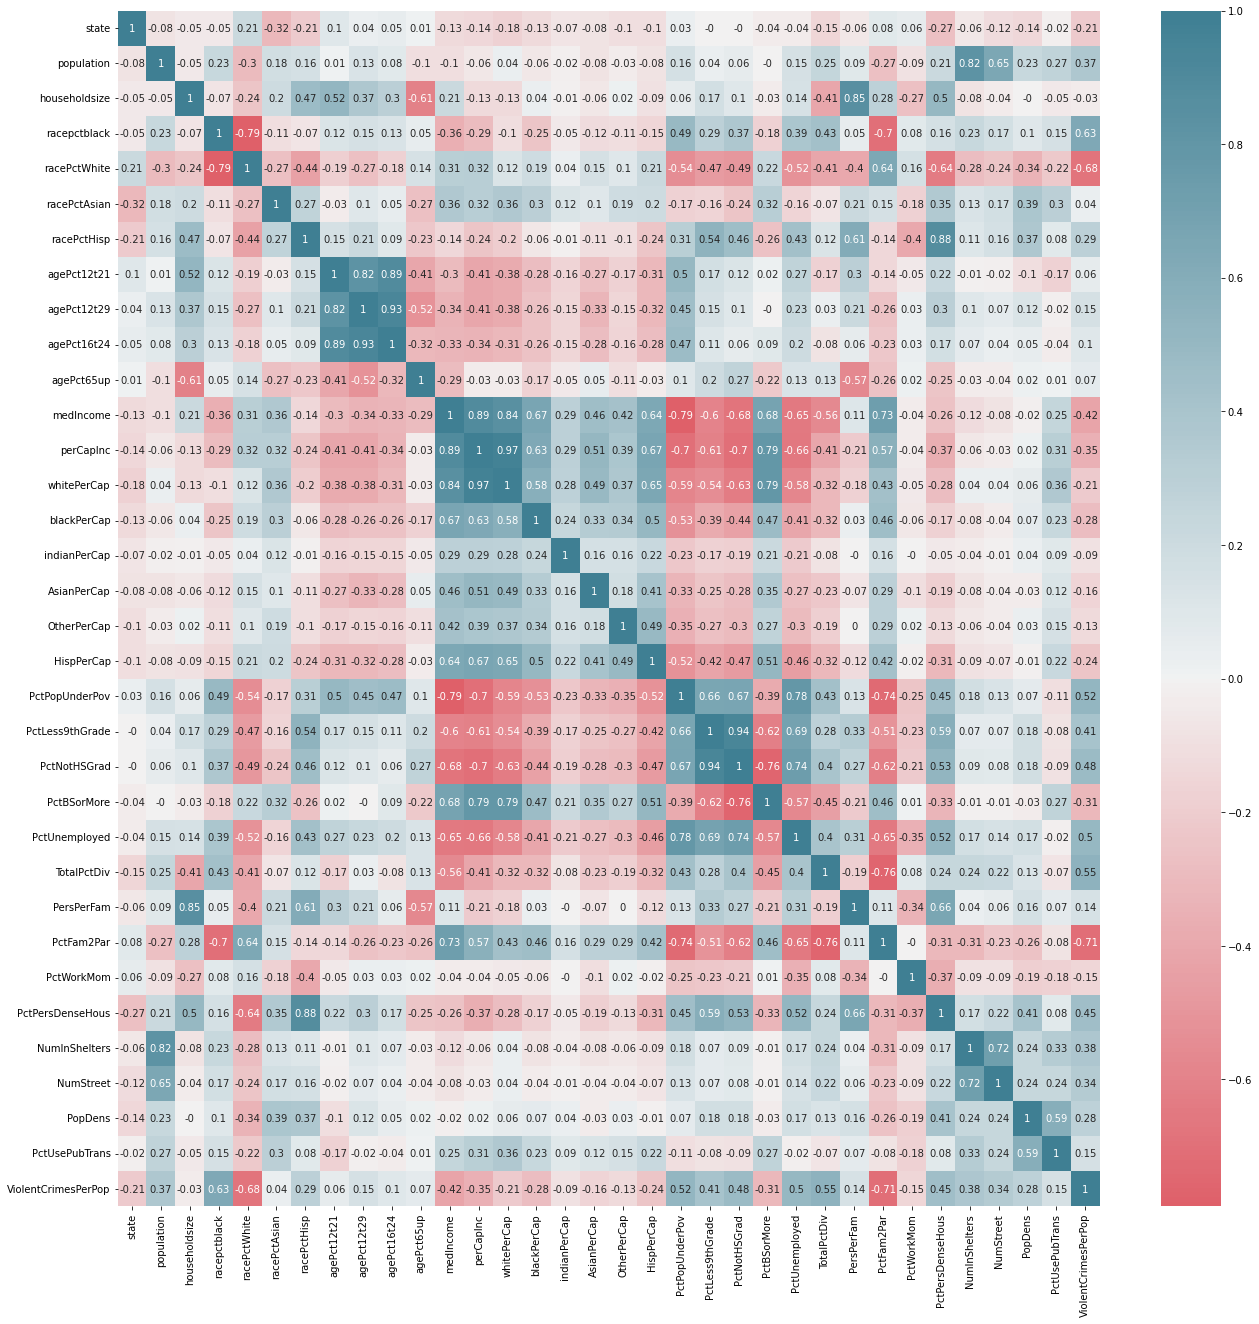

In [120]:
data.corr()
fig, ax = plt.subplots(figsize=(22,22))
cmap = sns.diverging_palette(10,220,as_cmap=True)
sns.heatmap(round(data.corr(),2),cmap=cmap, center=0,annot=True,linewidths=0,ax = ax)

- conclusiones: (Pato y fer)

## Distribución de variable objetivo

<AxesSubplot:xlabel='ViolentCrimesPerPop'>

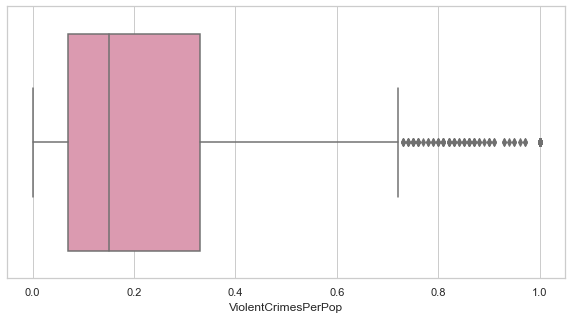

In [145]:
# datos por grupo
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(10,5))
#ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
sns.boxplot(x=data["ViolentCrimesPerPop"],color='#E68FAC')
#sns.boxplot(column="msrp",by="year",rot=45) #25200.0

## distribucion de los regresores

## DIAGRAMA DE CORRELACIÓN-DISPERSIÓN


In [154]:
data.columns

Index(['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'medIncome', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctWorkMom', 'PctPersDenseHous', 'NumInShelters',
       'NumStreet', 'PopDens', 'PctUsePubTrans', 'ViolentCrimesPerPop'],
      dtype='object')

In [152]:
data_1 = data[['state', 'population', 'householdsize', 'ViolentCrimesPerPop']]

In [155]:
data_2 = data[['racepctblack', 'racePctWhite','racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up']]

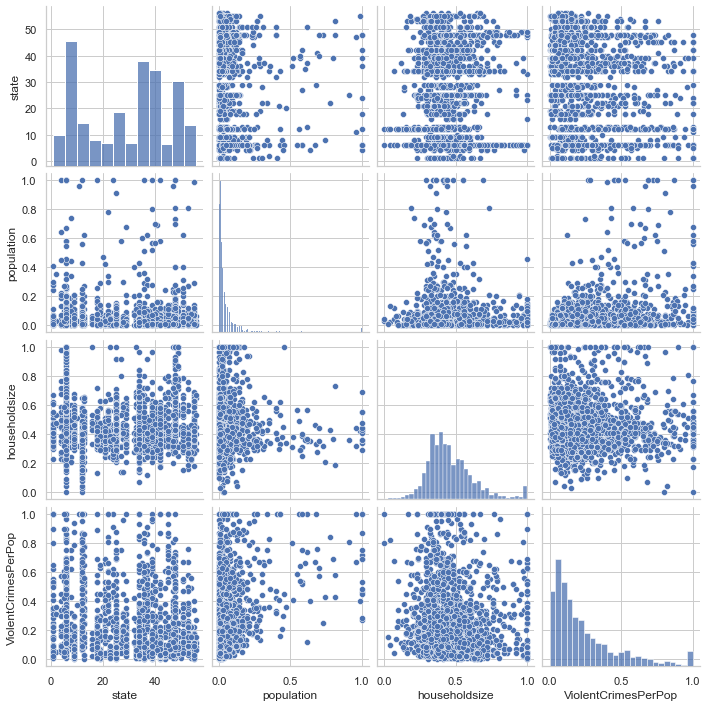

In [153]:
palette = sns.color_palette("husl", 7)
g = sns.pairplot(data_1,palette=palette)

- descripción: 
Con esta herramienta gráfica podemos visualizar la relación existente entre dos clases de datos etcetcetc

(fer)

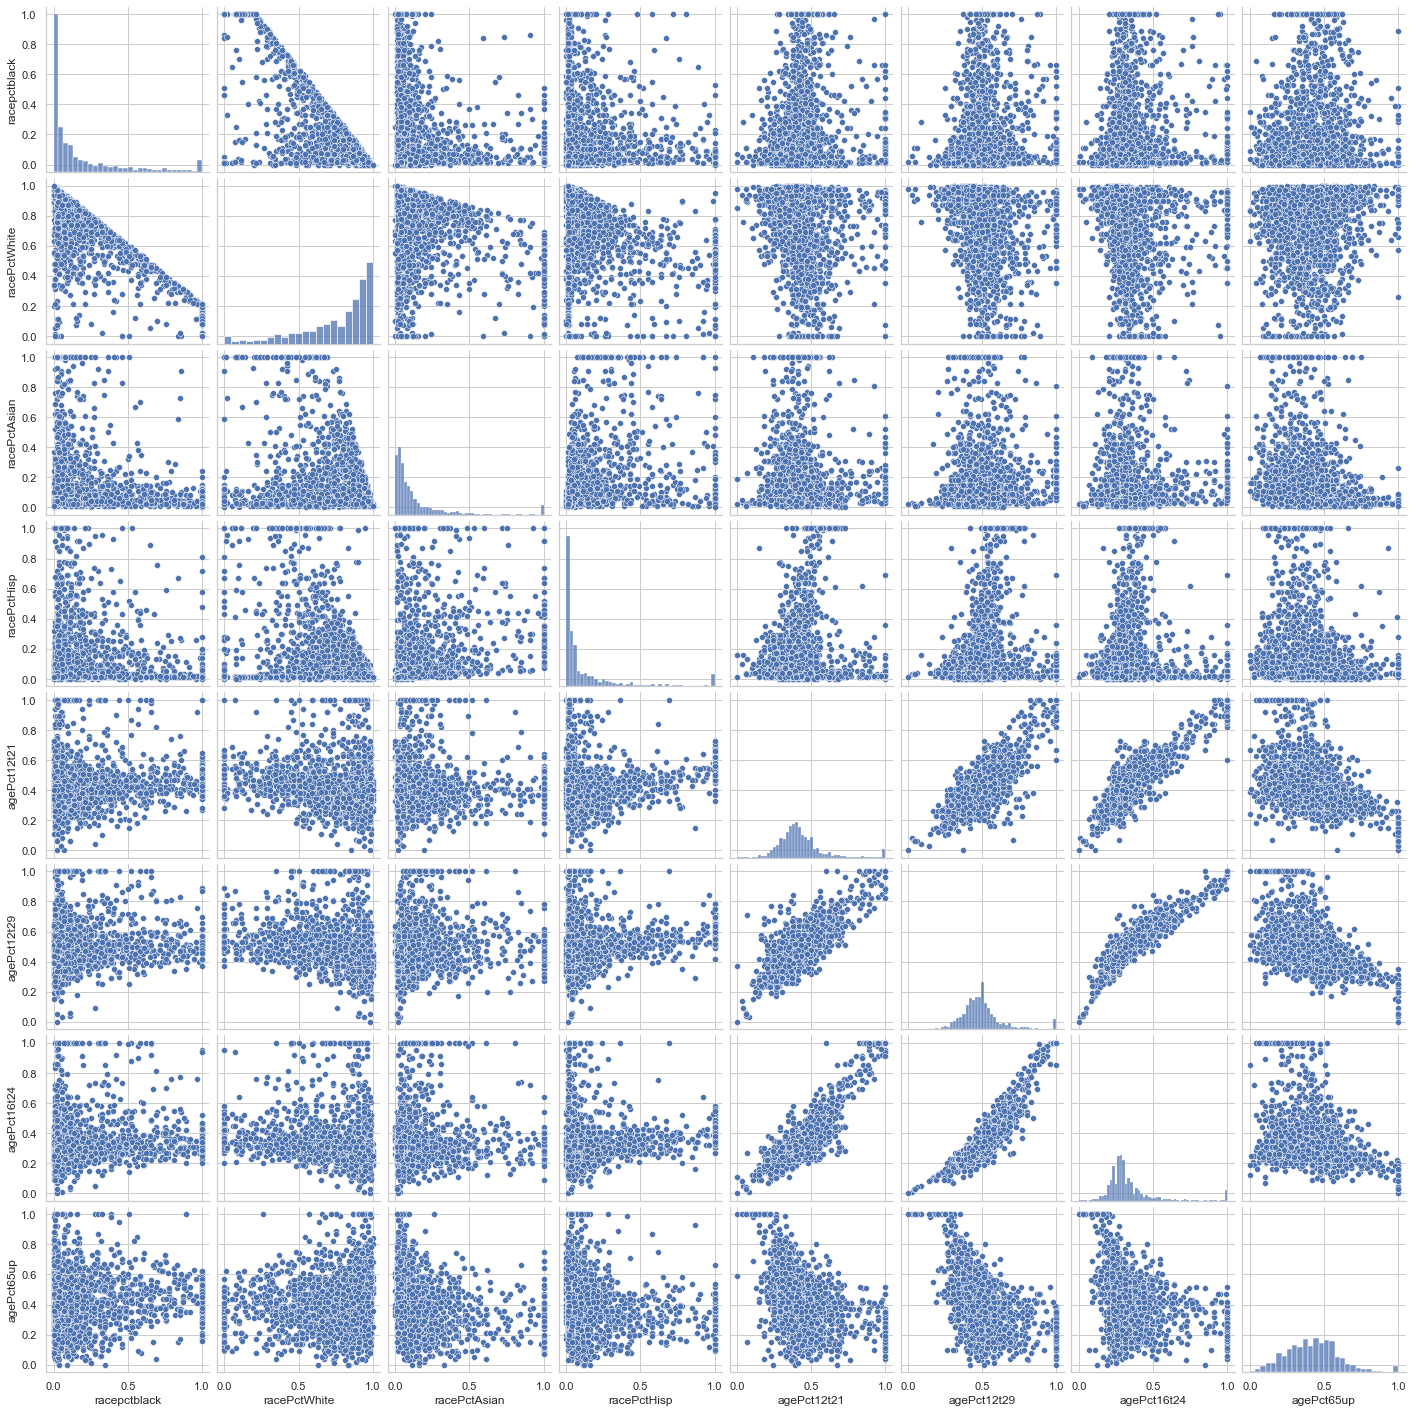

In [156]:
palette = sns.color_palette("husl", 7)
g = sns.pairplot(data_2,palette=palette)

# Guardar base de datos limpia

In [28]:
# base de datos con regresores que usaremos (hasta ahora) y sin nulos 
data_dir = 'Data'
filename = os.path.join(data_dir,'communities_data_clean.pkl')
data.to_pickle(filename)

# Split data (Train y Test)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
label = list(data.columns).pop(-1)
features = list(data.columns)
del features[-1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.33, random_state=42)

In [36]:
# base de datos con regresores que usaremos (hasta ahora) y sin nulos 
data_dir = 'Data'
filename = os.path.join(data_dir,'x_train.pkl')
X_train.to_pickle(filename)

filename = os.path.join(data_dir,'x_test.pkl')
X_test.to_pickle(filename)

filename = os.path.join(data_dir,'y_train.pkl')
y_train.to_pickle(filename)

filename = os.path.join(data_dir,'y_test.pkl')
y_test.to_pickle(filename)